<a href="https://colab.research.google.com/github/savitha14june/ai-impact-2030/blob/main/ai_impact_on_jobs_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Impact on job market 2030

In [1]:
import pandas as pd
#Raw file URL from Github
raw_file_url = 'https://raw.githubusercontent.com/savitha14june/ai-impact-2030/refs/heads/main/AI_Impact_on_Jobs_2030.csv'

#Read csv file
df = pd.read_csv(raw_file_url)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

Data cleanup

In [2]:
#Remove duplicates
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [3]:
#Check unique values
print(df['Job_Title'].unique())
print(df['Education_Level'].unique())
print(df['Risk_Category'].unique())

['Security Guard' 'Research Scientist' 'Construction Worker'
 'Software Engineer' 'Financial Analyst' 'AI Engineer' 'Mechanic'
 'Teacher' 'HR Specialist' 'Customer Support' 'UX Researcher' 'Lawyer'
 'Data Scientist' 'Graphic Designer' 'Retail Worker' 'Doctor'
 'Truck Driver' 'Chef' 'Nurse' 'Marketing Manager']
["Master's" 'PhD' 'High School' "Bachelor's"]
['High' 'Low' 'Medium']


In [4]:
#Write df to cleanup file
df.to_csv('ai_impact_data_cleanup.csv', index=False)

Graph on min and max automation probability for each Job_Title

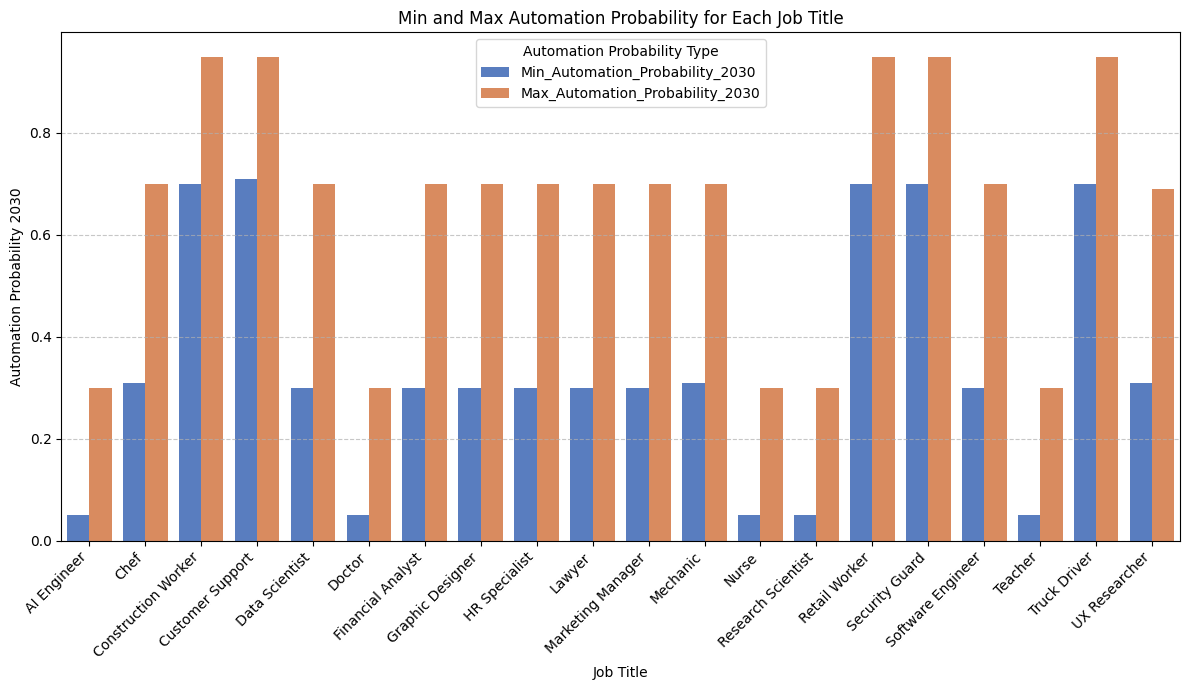

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate min and max automation probability for each Job_Title
automation_probability_stats = df.groupby('Job_Title')['Automation_Probability_2030'].agg(['min', 'max']).reset_index()
automation_probability_stats.rename(columns={'min': 'Min_Automation_Probability_2030', 'max': 'Max_Automation_Probability_2030'}, inplace=True)

# Melt the DataFrame to prepare for grouped bar chart
automation_stats_melted = automation_probability_stats.melt(
    id_vars=['Job_Title'],
    value_vars=['Min_Automation_Probability_2030', 'Max_Automation_Probability_2030'],
    var_name='Automation_Type',
    value_name='Automation_Probability'
)

plt.figure(figsize=(12, 7))
sns.barplot(x='Job_Title', y='Automation_Probability', hue='Automation_Type', data=automation_stats_melted, palette='muted')
plt.title('Min and Max Automation Probability for Each Job Title')
plt.xlabel('Job Title')
plt.ylabel('Automation Probability 2030')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Automation Probability Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
import seaborn as sns
import numpy as np

job_df = df.groupby('Job_Title')[['Automation_Probability_2030', 'AI_Exposure_Index']].mean().reset_index()
job_df = job_df.sort_values(by='Automation_Probability_2030', ascending=False)

#List of job titles for the x-axis
job_titles = job_df['Job_Title'].tolist()

automation_range_by_risk = df.groupby('Risk_Category')['Automation_Probability_2030'].agg(['min', 'max']).reset_index()
automation_range_by_risk.rename(columns={'min': 'Min_Automation_Probability_2030', 'max': 'Max_Automation_Probability_2030'}, inplace=True)
display(automation_range_by_risk)

,Risk_Category,Min_Automation_Probability_2030,Max_Automation_Probability_2030
0,High,0.71,0.95
1,Low,0.05,0.30
2,Medium,0.31,0.70
